In [1]:
## How to use Z Scores to remove outliers from a dataset

## First import pandas and matplotlib. We need pandas to find the zscore and matplotlib to visualize the data

import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
## Create a dataframe and show the first 5 rows
df = pd.read_csv("rent_apartment_moscow.csv")
df.head()

,Entry #,price,total_area
0,0,80000,50
1,1,27000,38
2,2,150000,130
3,3,47000,55
4,4,39000,33


In [3]:
## Number of rows and columns
df.shape

(4241, 3)

In [4]:
## Stats about the price column
df.price.describe()

count    4.241000e+03
mean     1.848907e+05
std      3.326858e+05
min      2.700000e+03
25%      4.500000e+04
50%      6.500000e+04
75%      2.000000e+05
max      5.837585e+06
Name: price, dtype: float64

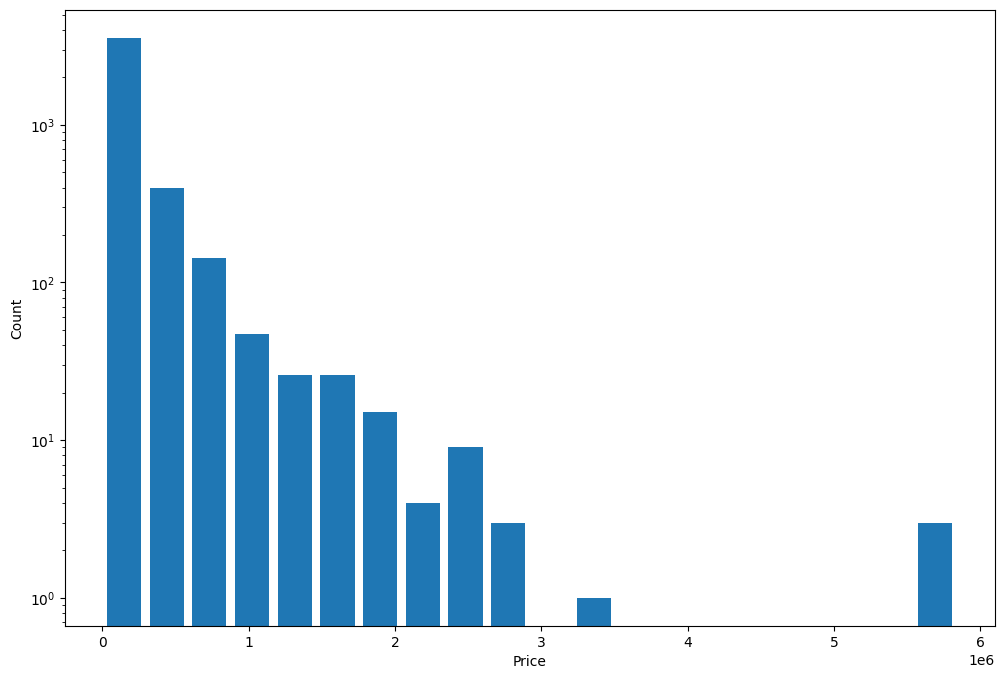

In [5]:
## Plot the price of each unit as a histogram. Because the count of low-price units is so much greater 
## than high-price units, I used a logarithmic scale to better see all the data. We can easily see the outliers
rent = plt.hist(df.price, bins=20, rwidth=0.8)
plt.xlabel('Price')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [6]:
## Find the mean
mean = df.price.mean()
mean

184890.68332940343

In [7]:
## Find the standard deviation
STDdev = df.price.std()
STDdev

332685.8437517341

In [8]:
## Create a column titled zscore, using the z-score formula
df['zscore'] = (df.price - df.price.mean())/df.price.std()
df.head()

,Entry #,price,total_area,zscore
0,0,80000,50,-0.315284
1,1,27000,38,-0.474594
2,2,150000,130,-0.104876
3,3,47000,55,-0.414477
4,4,39000,33,-0.438524


In [9]:
## Find all entries with a z-score greater than 3 or a z-score less than -3
df[(df.zscore>3) | (df.zscore<-3)]

,Entry #,price,total_area,zscore
662,662,1272343,64,3.268706
668,668,1600000,64,4.253590
681,681,1500000,64,3.953007
686,686,2000000,64,5.455926
1761,1761,1272343,330,3.268706
...,...,...,...,...
4209,4209,1500000,64,3.953007
4220,4220,1401020,64,3.655489
4221,4221,1401020,64,3.655489
4233,4233,1401020,64,3.655489


In [10]:
## Create a new data frame including all entries with a z-score less than 3 and greater than -3
df_no_outlier = df[(df.zscore<3) & (df.zscore>-3)]
df_no_outlier.shape

(4154, 4)

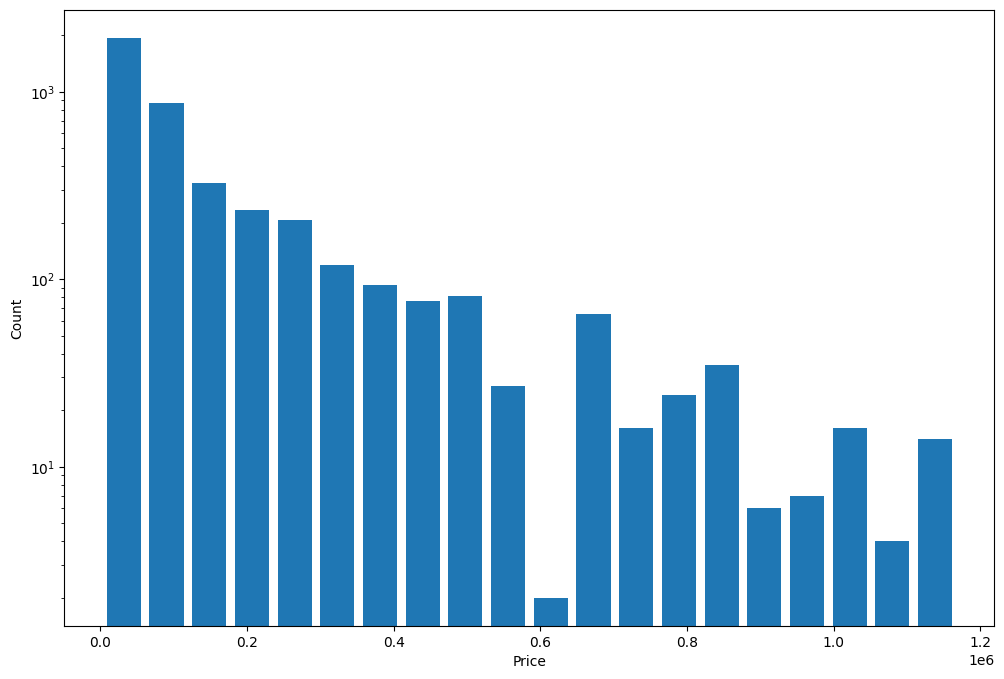

In [11]:
## Plot new data frame without outliers
rent = plt.hist(df_no_outlier.price, bins=20, rwidth=0.8)
plt.xlabel('Price')
plt.ylabel('Count')
plt.yscale('log')
plt.show()